# Démonstration dérivée numérique - Particle Image Velocimetry

In [1]:
%reset -f
import numpy as np
from matplotlib import pyplot as  plt
import pandas as pd

## Examiner le jeu de données

In [4]:
%ls piv_multi_data

position_0.dat   position_32.dat  position_55.dat  position_78.dat
position_10.dat  position_33.dat  position_56.dat  position_79.dat
position_11.dat  position_34.dat  position_57.dat  position_7.dat
position_12.dat  position_35.dat  position_58.dat  position_80.dat
position_13.dat  position_36.dat  position_59.dat  position_81.dat
position_14.dat  position_37.dat  position_5.dat   position_82.dat
position_15.dat  position_38.dat  position_60.dat  position_83.dat
position_16.dat  position_39.dat  position_61.dat  position_84.dat
position_17.dat  position_3.dat   position_62.dat  position_85.dat
position_18.dat  position_40.dat  position_63.dat  position_86.dat
position_19.dat  position_41.dat  position_64.dat  position_87.dat
position_1.dat   position_42.dat  position_65.dat  position_88.dat
position_20.dat  position_43.dat  position_66.dat  position_89.dat
position_21.dat  position_44.dat  position_67.dat  position_8.dat
position_22.dat  position_45.dat  position_68.dat  position_90.d

In [6]:
# Juste voir de quoi chaque fichier a l'air - première colonne étant la position en x, et la deuxième étant la position en y
np.loadtxt('piv_multi_data/position_0.dat')

array([[0.        , 0.        ],
       [0.        , 0.11111111],
       [0.        , 0.22222222],
       [0.        , 0.33333333],
       [0.        , 0.44444444],
       [0.        , 0.55555556],
       [0.        , 0.66666667],
       [0.        , 0.77777778],
       [0.        , 0.88888889],
       [0.        , 1.        ]])

## Initialisation 

In [7]:
# Les valeurs insérées manuellement -- hardcoded

# Nombre de photos (pas de temps)
n_t = 100

# Nombre de particules suivies
n_part = 10

# Pas de temps - de la formulation du problème
dt = 0.001 # secondes

# Temps initial
t0 = 10    # secondes

# Les colonnes dans les fichiers de données
col_des_x = 0
col_des_y = 1

In [8]:
# Initialiser les tableaux de données vides

# Positions des particules selon l'axe de x
x = np.zeros((n_part, n_t), float)

# Positions en y
y = np.zeros_like(x)

# Vitesse des particules selon l'axe de x
v_x = np.zeros_like(x)
v_y = np.zeros_like(v_x)

# temps
t = np.zeros(n_t, float)

## Extraire le jeu de données et l'organiser par tableaux

In [10]:
for i in range(n_t):
    # Lire chaque fichier
    raw = np.loadtxt(f'piv_multi_data/position_{i}.dat')
    
    # organiser la donnée
    x[:, i] = raw[:, col_des_x]
    y[:, i] = raw[:, col_des_y]
    t[i] = t0 + dt * i

In [11]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.000010,0.000039,0.000088,0.000155,0.000241,0.000345,0.000467,0.000607,0.000765,...,0.052749,0.053699,0.054653,0.055611,0.056574,0.057540,0.058511,0.059485,0.060464,0.061446
2,0.0,0.000017,0.000068,0.000153,0.000271,0.000421,0.000604,0.000818,0.001063,0.001339,...,0.092311,0.093973,0.095643,0.097320,0.099004,0.100696,0.102394,0.104099,0.105812,0.107530
3,0.0,0.000022,0.000088,0.000197,0.000349,0.000542,0.000776,0.001052,0.001367,0.001721,...,0.118686,0.120823,0.122969,0.125126,0.127291,0.129466,0.131650,0.133842,0.136043,0.138253
4,0.0,0.000025,0.000098,0.000219,0.000387,0.000602,0.000863,0.001169,0.001519,0.001913,...,0.131873,0.134248,0.136633,0.139028,0.141435,0.143851,0.146277,0.148713,0.151159,0.153615
5,0.0,0.000025,0.000098,0.000219,0.000387,0.000602,0.000863,0.001169,0.001519,0.001913,...,0.131873,0.134248,0.136633,0.139028,0.141435,0.143851,0.146277,0.148713,0.151159,0.153615
6,0.0,0.000022,0.000088,0.000197,0.000349,0.000542,0.000776,0.001052,0.001367,0.001721,...,0.118686,0.120823,0.122969,0.125126,0.127291,0.129466,0.131650,0.133842,0.136043,0.138253
7,0.0,0.000017,0.000068,0.000153,0.000271,0.000421,0.000604,0.000818,0.001063,0.001339,...,0.092311,0.093973,0.095643,0.097320,0.099004,0.100696,0.102394,0.104099,0.105812,0.107530
8,0.0,0.000010,0.000039,0.000088,0.000155,0.000241,0.000345,0.000467,0.000607,0.000765,...,0.052749,0.053699,0.054653,0.055611,0.056574,0.057540,0.058511,0.059485,0.060464,0.061446
9,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [12]:
t

array([10.   , 10.001, 10.002, 10.003, 10.004, 10.005, 10.006, 10.007,
       10.008, 10.009, 10.01 , 10.011, 10.012, 10.013, 10.014, 10.015,
       10.016, 10.017, 10.018, 10.019, 10.02 , 10.021, 10.022, 10.023,
       10.024, 10.025, 10.026, 10.027, 10.028, 10.029, 10.03 , 10.031,
       10.032, 10.033, 10.034, 10.035, 10.036, 10.037, 10.038, 10.039,
       10.04 , 10.041, 10.042, 10.043, 10.044, 10.045, 10.046, 10.047,
       10.048, 10.049, 10.05 , 10.051, 10.052, 10.053, 10.054, 10.055,
       10.056, 10.057, 10.058, 10.059, 10.06 , 10.061, 10.062, 10.063,
       10.064, 10.065, 10.066, 10.067, 10.068, 10.069, 10.07 , 10.071,
       10.072, 10.073, 10.074, 10.075, 10.076, 10.077, 10.078, 10.079,
       10.08 , 10.081, 10.082, 10.083, 10.084, 10.085, 10.086, 10.087,
       10.088, 10.089, 10.09 , 10.091, 10.092, 10.093, 10.094, 10.095,
       10.096, 10.097, 10.098, 10.099])

## Calculer la dérivée centrée

In [13]:
# Une façon tout à fait appropriée de faire, avec deux boucles

# On passe à travers chaque pas de temps, sauf le premier et le dernier
for i in range(1, n_t - 1):
    # On fait le calcul pour chaque particule
    for j in range(n_part):
        # -------------------------------------------------------
        # Dérivée centrée : dfdt_i = (f_i+1 - f_i-1) / (2 * dt)
        # 
        v_x[j, i] = (x[j, i+1] - x[j, i-1]) / (2 * dt)
        # -------------------------------------------------------
        

In [14]:
%%timeit
# Mais notre code est TRÈS LENT. 
# 2 ms pour un jeu de juste 1000 points de données, c'est pas fort

for i in range(1, n_t - 1):
    for j in range(n_part):
        v_x[j, i] = (x[j, i+1] - x[j, i-1]) / (2 * dt)
        

564 µs ± 10.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [15]:
%%timeit
# On peut vectoriser un peu en enlevant une première boucle. 
# Notre calcul s'applique à toutes les particules (rangées)

for i in range(1, n_t - 1):
        v_x[:, i] = (x[:, i+1] - x[:, i-1]) / (2 * dt)
        

188 µs ± 2.52 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [16]:
%%timeit
# Mieux encore, on peut vectoriser notre calcul de la dérivée centrée!

v_x[:, 1:-1] = (x[:, 2:] - x[:, :-2]) / (2 * dt)


5.67 µs ± 111 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Dérivées initiales et finales

In [176]:
# Dérivée avant du 2e ordre pour le premier pas de temps
v_x[:, 0] = (-x[:,2] + 4 * x[:, 1] - 3 * x[:, 0]) / (2 * dt)

In [177]:
# Dérivée arrière du 2e ordre pour le dernier pas de temps
v_x[:, -1] = (3 * x[:, -1] - 4 * x[:, -2] + x[:, -3]) / (2 * dt)

In [178]:
pd.DataFrame(v_x)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000098,0.019557,0.038871,0.057896,0.076637,0.095097,0.113279,0.131188,0.148828,0.166201,...,0.947485,0.951861,0.956153,0.960363,0.964493,0.968543,0.972515,0.976410,0.980228,0.984009
2,0.000171,0.034225,0.068024,0.101318,0.134114,0.166419,0.198239,0.229580,0.260448,0.290851,...,1.658099,1.665756,1.673267,1.680635,1.687862,1.694950,1.701901,1.708717,1.715400,1.722016
3,0.000220,0.044003,0.087459,0.130266,0.172433,0.213967,0.254878,0.295174,0.334862,0.373952,...,2.131842,2.141686,2.151344,2.160817,2.170109,2.179222,2.188158,2.196922,2.205514,2.214021
4,0.000244,0.048892,0.097177,0.144740,0.191592,0.237741,0.283198,0.327971,0.372069,0.415502,...,2.368713,2.379651,2.390382,2.400908,2.411232,2.421357,2.431287,2.441024,2.450571,2.460023
5,0.000244,0.048892,0.097177,0.144740,0.191592,0.237741,0.283198,0.327971,0.372069,0.415502,...,2.368713,2.379651,2.390382,2.400908,2.411232,2.421357,2.431287,2.441024,2.450571,2.460023
6,0.000220,0.044003,0.087459,0.130266,0.172433,0.213967,0.254878,0.295174,0.334862,0.373952,...,2.131842,2.141686,2.151344,2.160817,2.170109,2.179222,2.188158,2.196922,2.205514,2.214021
7,0.000171,0.034225,0.068024,0.101318,0.134114,0.166419,0.198239,0.229580,0.260448,0.290851,...,1.658099,1.665756,1.673267,1.680635,1.687862,1.694950,1.701901,1.708717,1.715400,1.722016
8,0.000098,0.019557,0.038871,0.057896,0.076637,0.095097,0.113279,0.131188,0.148828,0.166201,...,0.947485,0.951861,0.956153,0.960363,0.964493,0.968543,0.972515,0.976410,0.980228,0.984009
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Visualisation du diagramme d'écoulement

In [180]:
# Pour matplotlib, il faut spécifier le temps pour chaque point de données.
# On fait juste répéter le vecteur temps pour chaque particule
tm = np.tile(t, [n_part, 1])

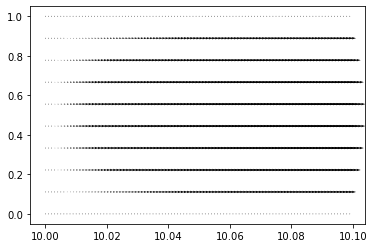

In [182]:
# Oups!! On a tellement de points de données qu'on ne voit pas les flèches
fig, ax = plt.subplots()
ax.quiver(tm, y, v_x, v_y)
plt.show()

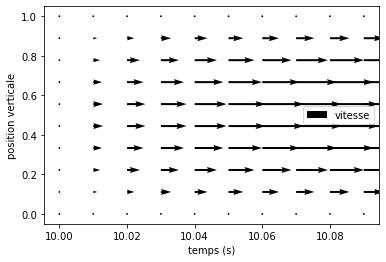

In [183]:
# On refait le graphique, mais pour un point sur 10
#
fig, ax = plt.subplots()
ax.set_ylabel('position verticale')
ax.set_xlabel('temps (s)')

ax.quiver(tm[:,::10], y[:, ::10], v_x[:, ::10], v_y[:, ::10], label='vitesse')
plt.legend()
plt.show()